# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import Data

In [2]:
path = "../Data/Android_App_Market_on_Google_Play/datasets/apps.csv"
path2 = "../Data/Android_App_Market_on_Google_Play/datasets/user_reviews.csv"

In [3]:
apps = pd.read_csv(path).drop(["Unnamed: 0"], axis=1)
reviews = pd.read_csv(path2)

# Data Cleaning

In [4]:
apps.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 6.4 MB


In [5]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Converted Price to Float data type
apps["Price"] = apps.Price.str.replace("$", "").astype("float64")

In [7]:
apps.rename(columns={
    "Price": "Price ($)"
}, inplace=True)

In [8]:
# Converted Last Updated to DataTime Format
apps["Last Updated"] = pd.to_datetime(apps["Last Updated"])

In [9]:
# The Dtypes for the final Dataset
apps.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   object        
 6   Type            9659 non-null   object        
 7   Price ($)       9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 5.3 MB


In [10]:
# Make Install categories uniform
apps.query("Installs == '0'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,Free,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [11]:
apps.loc[8028, "Installs"] = "0+"

In [12]:
# Checking for NaN values (NaN left in the dataset)
apps[apps.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7,"5,000+",Free,0.0,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0,"100,000+",Free,0.0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,"1,000,000+",Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,"5,000,000+",Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device
9649,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8,"5,000+",Free,0.0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up
9653,FR Forms,BUSINESS,NaN,0,9.6,10+,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0.0,Everyone,Medical,2017-01-20,1,2.2 and up


## Save cleaned app file as pickle file

In [13]:
#pd.to_pickle(apps, "cleaned_apps.pkl")

## Further Data EDA

In [14]:
apps["Installs"].value_counts()

Installs
1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  15
Name: count, dtype: int64

In [15]:
# Installs above 500,000,000
mask = (apps.Installs == "500,000,000+") | (apps.Installs == "1,000,000,000+")

# Installs above 100,000,000
mask2 = (apps.Installs == "500,000,000+") | (apps.Installs == "1,000,000,000+") | (apps.Installs == "100,000,000+")

# Installs above 1,000,000
mask3 = (apps.Installs == "500,000,000+") | (apps.Installs == "1,000,000,000+") | (apps.Installs == "100,000,000+") | (apps.Installs == "50,000,000+") | (apps.Installs == "5,000,000+") | (apps.Installs == "10,000,000+") | (apps.Installs == "1,000,000+")

# Installs below 1,000,000
mask4 = (apps.Installs == "500,000+") | (apps.Installs == "100,000+") | (apps.Installs == "10,000+") | (apps.Installs == "1,000+") | (apps.Installs == "100+") | (apps.Installs == "50,000+") | (apps.Installs == "5,000+") | (apps.Installs == "10+") | (apps.Installs == "500+") | (apps.Installs == "50+") | (apps.Installs == "500,000+") | (apps.Installs == "5+") | (apps.Installs == "1+") | (apps.Installs == "0+")

In [16]:
app_installs_500M = apps.query("@mask")
app_installs_100M = apps.query("@mask2")
app_installs_1M = apps.query("@mask3")
app_installs_below_1M = apps.query("@mask4")

In [17]:
app_installs_below_1M.shape

(6264, 13)

In [18]:
app_installs_1M.shape

(3395, 13)

In [19]:
app_installs_100M.shape

(232, 13)

In [20]:
app_installs_500M.shape

(44, 13)

In [21]:
app_installs_500M.Category.value_counts().sort_values(ascending=False).head()

Category
COMMUNICATION    11
TOOLS             6
GAME              5
SOCIAL            5
PRODUCTIVITY      5
Name: count, dtype: int64

In [22]:
app_installs_below_1M.Category.value_counts().sort_values(ascending=False).head()

Category
FAMILY      1303
TOOLS        554
GAME         406
MEDICAL      377
BUSINESS     351
Name: count, dtype: int64

In [23]:
app_installs_1M.Category.value_counts().sort_values(ascending=False).head()

Category
GAME            553
FAMILY          529
TOOLS           273
PHOTOGRAPHY     173
PRODUCTIVITY    147
Name: count, dtype: int64

In [24]:
apps.Category.value_counts().sort_values(ascending=False).head()

Category
FAMILY      1832
GAME         959
TOOLS        827
BUSINESS     420
MEDICAL      395
Name: count, dtype: int64

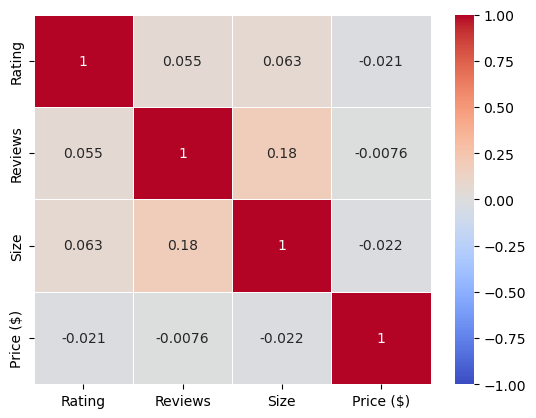

In [25]:
sns.heatmap(apps.corr(numeric_only=True),
            annot=True,
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            cmap="coolwarm"
           );

### Data cleaning of second dataset

In [26]:
reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [27]:
reviews.Sentiment.value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5163
Name: count, dtype: int64

In [28]:
reviews2 = reviews.dropna(subset=["Sentiment", "Translated_Review"])

In [29]:
reviews2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [30]:
reviews2[reviews2.isna().any(axis=1)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [31]:
reviews2 = reviews2.reset_index(drop=True)

In [32]:
reviews2[reviews2.Sentiment == "Neutral"]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
6,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
7,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
19,10 Best Foods for You,God health,Neutral,0.0,0.0
22,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
26,10 Best Foods for You,On test....,Neutral,0.0,0.0
...,...,...,...,...,...
37401,Hotwire Hotel & Car Rental App,Solid app. No issues yet. Been using year.,Neutral,0.0,0.1
37405,Hotwire Hotel & Car Rental App,"Keeps telling there's problem date time, can't...",Neutral,0.0,0.0
37410,Housing-Real Estate & Property,Why business? Your filters don't work.. redire...,Neutral,0.0,0.0
37412,Housing-Real Estate & Property,I want list property sale option. Please connect,Neutral,0.0,0.0


## Merging 2 dataframes (apps and reviews)

In [33]:
apps_and_reviews = apps.merge(
    reviews2,
    "inner",
    "App"
).reset_index(drop=True)

In [34]:
apps_and_reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


### Save merged apps and reviews dataset as pickel

In [35]:
#pd.to_pickle(apps_and_reviews, "apps_and_reviews.pkl")

In [36]:
apps_and_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35929 entries, 0 to 35928
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     35929 non-null  object        
 1   Category                35929 non-null  object        
 2   Rating                  35929 non-null  float64       
 3   Reviews                 35929 non-null  int64         
 4   Size                    24069 non-null  float64       
 5   Installs                35929 non-null  object        
 6   Type                    35929 non-null  object        
 7   Price ($)               35929 non-null  float64       
 8   Content Rating          35929 non-null  object        
 9   Genres                  35929 non-null  object        
 10  Last Updated            35929 non-null  datetime64[ns]
 11  Current Ver             35929 non-null  object        
 12  Android Ver             35929 non-null  object

In [37]:
apps_and_reviews.Sentiment.value_counts()

Sentiment
Positive    23073
Negative     8005
Neutral      4851
Name: count, dtype: int64

In [38]:
apps_and_reviews.groupby(["Category","Sentiment"])["App"].count()

Category           Sentiment
ART_AND_DESIGN     Negative      61
                   Neutral       62
                   Positive     259
AUTO_AND_VEHICLES  Negative      17
                   Neutral       36
                               ... 
VIDEO_PLAYERS      Neutral       58
                   Positive     190
WEATHER            Negative      28
                   Neutral       31
                   Positive     142
Name: App, Length: 99, dtype: int64

**The visuals contain:**
- Scatterplot
- Pie chart (sentiment analysis) per category of apps
- Bar Chart 

# Dash App

In [40]:
from dash import Dash, dcc, html, dash_table, ctx
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
from dash_bootstrap_templates import load_figure_template

import dash_bootstrap_components as dbc

import plotly.express as px
import pandas as pd

apps_df = pd.read_pickle("../Data/cleaned_apps.pkl")
apps_and_reviews = pd.read_pickle("../Data/apps_and_reviews.pkl")

dbc_css = "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"

table_style = {
    'backgroundColor': 'rgb(50, 50, 50)',
    'color': 'grey',
    'font-family': "Arial"
}

app = Dash(__name__, external_stylesheets=[dbc.themes.SLATE, dbc_css]
          )

load_figure_template("QUARTZ")

app.layout = dbc.Container([
    dbc.Row(html.H1("Android App Market: Analyzing Google Play Store Data", style={"textAlign": "center"})),
    html.Br(),
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dcc.Markdown("Select Variable for X Axis"),
                dcc.RadioItems(
                    id="numeric_columns",
                    options=["Rating", "Reviews", "Size", "Price ($)"],
                    value="Rating"
                ),
                html.Hr(),
                dcc.Markdown("Select Variable for Y Axis"),
                dcc.RadioItems(
                    id="numeric_columns2",
                    options=["Rating", "Reviews", "Size", "Price ($)"],
                    value="Reviews"
                ),
            ])
        ], width=2),
        dbc.Col([
            dbc.Row(html.H4("Numerical Data Scatter Plot")),
            dcc.Graph(id="numeric_scatter")
                ]),
        dbc.Col([
            dbc.Row(
                dcc.Dropdown(
                    options=list(apps_df.Category.value_counts().index),
                    value="COMICS",
                    id="category_dropdown"
            )),
            dcc.Graph(id="category_pie")
        ])
    ]),
    html.Br(),
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dcc.Markdown("The Aggregation"),
                dcc.RadioItems(
                    id="bar_radio",
                    options=["min", "max", "mean"],
                    value="mean"
                ),
                html.Hr(),
                dcc.Markdown("Variable to be checked"),
                dcc.RadioItems(
                    id="bar_radio2",
                    options=["Price ($)", "Rating", "Reviews"],
                    value="Rating"
                ),
                html.Hr(),
                 dcc.RadioItems(
                    id="bar_radio3",
                    options=["top 5", "bottom 5"],
                    value="top 5"
                ),
            ])  
        ], width=2),
        dbc.Col([
            dcc.Graph(id="bar_graph")
        ], width=8),
        dbc.Col([
            dbc.Card([
                dcc.Markdown("The 'Facebook' App from the 'SOCIAL' Category has the most reviews", style={"textAlign": "center"})
            ]),
            # html.Br(),
            dbc.Card([
                dcc.Markdown("The 'COMMUNUCATION' Category has the most apps that have over 500,000,000 installations for a single app", style={"textAlign": "center"})
            ]),
            # html.Br(),
            dbc.Card([
                dcc.Markdown("Apps in the 'EVENTS' Category has the highest average rating (4.44)", style={"textAlign": "center"})
            ]),
            # html.Br(),
            dbc.Card([
                dcc.Markdown("The most apps (by count) are in the 'FAMILY' Category, with 'BEAUTY' having the least", style={"textAlign": "center"})
            ]),
        ])
        
    ])
])

@app.callback(
    Output("numeric_scatter", "figure"),
    Input("numeric_columns", "value"),
    Input("numeric_columns2", "value"),
)

def numeric_column_scatterplot(x_axis, y_axis):
    fig = px.scatter(
        apps_df,
        x=x_axis,
        y=y_axis,
        hover_name="Category",
        color="Content Rating"
    )

    return fig 

@app.callback(
    Output("category_pie", "figure"),
    Input("category_dropdown", "value")
)

def categorical_piechart(category):
    fig = px.pie(
        apps_and_reviews[apps_and_reviews.Category == category],
        names="Sentiment"
    )

    return fig

@app.callback(
    Output("bar_graph", "figure"),
    Input("bar_radio", "value"),
    Input("bar_radio2", "value"),
    Input("bar_radio3", "value")
)

def categorical_barplot(aggregate,variable, section):
    if section == "top 5":
        fig = px.bar(
                apps_df.groupby("Category").agg({variable: aggregate}).sort_values(by=variable, ascending=False).head()
            )
    else:
        fig = px.bar(
                apps_df.groupby("Category").agg({variable: aggregate}).sort_values(by=variable, ascending=False).tail()
            )
    return fig
            

if __name__=="__main__":
    app.run_server(jupyter_mode="tab", port=8097)

Dash app running on http://127.0.0.1:8097/


<IPython.core.display.Javascript object>